In [1]:
import os
import pandas as pd
import numpy as np

# raporttitiedostot luetaan    
def read_files(path):
    file_list = []
    
    for filename in os.listdir(path):
        if filename == ".DS_Store":
            continue
        data = pd.read_table(os.path.join(path, filename), sep=";", encoding='UTF-16')
        file_list.append(data) 
                
    return file_list

data = read_files("../data/")

In [2]:
# yhdistetään yhdeksi dataframeksi
df = pd.concat(data)
df.head()

,Mittauspiste Sijainti Päivä Suuntakoodi Ajoneuvoluokka,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,KLO_00-01,KLO_01-02,KLO_02-03,KLO_03-04,KLO_04-05,...,KLO_14-15,KLO_15-16,KLO_16-17,KLO_17-18,KLO_18-19,KLO_19-20,KLO_20-21,KLO_21-22,KLO_22-23,KLO_23-00
0,1030,vt3_Vaasa_Mt,01.05.2020,1,11 HA-PA,74,50,17,18,16,...,294,341,328,294,267,221,185,123,104,87
1,1030,vt3_Vaasa_Mt,01.05.2020,1,12 KAIP,,1,1,,3,...,3,1,1,2,1,1,1,2,,1
2,1030,vt3_Vaasa_Mt,01.05.2020,1,13 Linja-autot,,,,,,...,1,,,,,,,,1,
3,1030,vt3_Vaasa_Mt,01.05.2020,1,14 KAPP,,1,,1,,...,1,,1,1,,,,1,1,1
4,1030,vt3_Vaasa_Mt,01.05.2020,1,15 KATP,5,1,6,4,5,...,2,1,4,2,3,2,4,1,2,2


In [3]:
# nimetään uudelleen sarakkeet, jotka eivät tulleet oikein
df = df.rename({" Mittauspiste Sijainti Päivä Suuntakoodi Ajoneuvoluokka":"Mittauspiste", \
                             "Unnamed: 1": "Sijainti", "Unnamed: 2": "Päivä", "Unnamed: 3": "Suuntakoodi", \
                             "Unnamed: 4": "Ajoneuvoluokka"}, axis=1)

# Lukumäärät numeroiksi objektin sijaan
df[[" KLO_00-01", " KLO_01-02", " KLO_02-03", " KLO_03-04", " KLO_04-05", " KLO_05-06", " KLO_06-07", \
    " KLO_07-08", " KLO_08-09", " KLO_09-10", " KLO_10-11", " KLO_11-12", " KLO_12-13", " KLO_13-14", \
    " KLO_14-15", " KLO_15-16", " KLO_16-17", " KLO_17-18", " KLO_18-19", " KLO_19-20", " KLO_20-21", \
    " KLO_21-22", " KLO_22-23", " KLO_23-00"]] = df[[" KLO_00-01", " KLO_01-02", " KLO_02-03", \
                                                     " KLO_03-04", " KLO_04-05", " KLO_05-06", " KLO_06-07", \
                                                     " KLO_07-08", " KLO_08-09", " KLO_09-10", " KLO_10-11", \
                                                     " KLO_11-12", " KLO_12-13", " KLO_13-14", " KLO_14-15", \
                                                     " KLO_15-16", " KLO_16-17", " KLO_17-18", " KLO_18-19", \
                                                     " KLO_19-20", " KLO_20-21", " KLO_21-22", " KLO_22-23", \
                                                     " KLO_23-00"]].apply(pd.to_numeric, errors='coerce')

# kellonajat kätevämpään muotoon
df = df.rename({" KLO_00-01":"00:00", " KLO_01-02":"01:00", " KLO_02-03":"02:00", " KLO_03-04":"03:00", \
                " KLO_04-05":"04:00", " KLO_05-06":"05:00", " KLO_06-07":"06:00", " KLO_07-08":"07:00", \
                " KLO_08-09":"08:00", " KLO_09-10":"09:00", " KLO_10-11":"10:00", " KLO_11-12":"11:00", \
                " KLO_12-13":"12:00", " KLO_13-14":"13:00", " KLO_14-15":"14:00", " KLO_15-16":"15:00", \
                " KLO_16-17":"16:00", " KLO_17-18":"17:00", " KLO_18-19":"18:00", " KLO_19-20":"19:00", \
                " KLO_20-21":"20:00", " KLO_21-22":"21:00", " KLO_22-23":"22:00", " KLO_23-00":"23:00"}, 
               axis=1)

# Korvataan puuttuvat arvot nollilla.
df.fillna(0, inplace = True)
df.shape

(43726, 29)

In [4]:
df.head()

,Mittauspiste,Sijainti,Päivä,Suuntakoodi,Ajoneuvoluokka,00:00,01:00,02:00,03:00,04:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
0,1030,vt3_Vaasa_Mt,01.05.2020,1,11 HA-PA,74.0,50.0,17.0,18.0,16.0,...,294.0,341.0,328.0,294.0,267.0,221.0,185.0,123.0,104.0,87.0
1,1030,vt3_Vaasa_Mt,01.05.2020,1,12 KAIP,0.0,1.0,1.0,0.0,3.0,...,3.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0
2,1030,vt3_Vaasa_Mt,01.05.2020,1,13 Linja-autot,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1030,vt3_Vaasa_Mt,01.05.2020,1,14 KAPP,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1030,vt3_Vaasa_Mt,01.05.2020,1,15 KATP,5.0,1.0,6.0,4.0,5.0,...,2.0,1.0,4.0,2.0,3.0,2.0,4.0,1.0,2.0,2.0


In [7]:
# Muutetaan päivämäärä-sarake päivämääräksi ja katsotaan eroja päiväkohtaisesti
df2 = df.copy().drop(['Sijainti', 'Ajoneuvoluokka', 'Suuntakoodi', 'Mittauspiste'], axis=1)
df2 = df2.melt(id_vars=['Päivä'], var_name='Hour', value_name='N')
df2['Aika'] = pd.to_datetime(df2.apply(lambda row: "{0} {1}".format(str(row['Päivä']), str(row['Hour'])), 
                                       axis=1), dayfirst=True, errors='coerce')
df2 = df2.drop(['Päivä', 'Hour'], axis=1)
df2 = df2.groupby(df2['Aika']).sum()
df2.head(30)

,N
Aika,
2020-01-01 00:00:00,12650.0
2020-01-01 01:00:00,11666.0
2020-01-01 02:00:00,8620.0
2020-01-01 03:00:00,6654.0
2020-01-01 04:00:00,5784.0
2020-01-01 05:00:00,6286.0
2020-01-01 06:00:00,7154.0
2020-01-01 07:00:00,5354.0
2020-01-01 08:00:00,4668.0


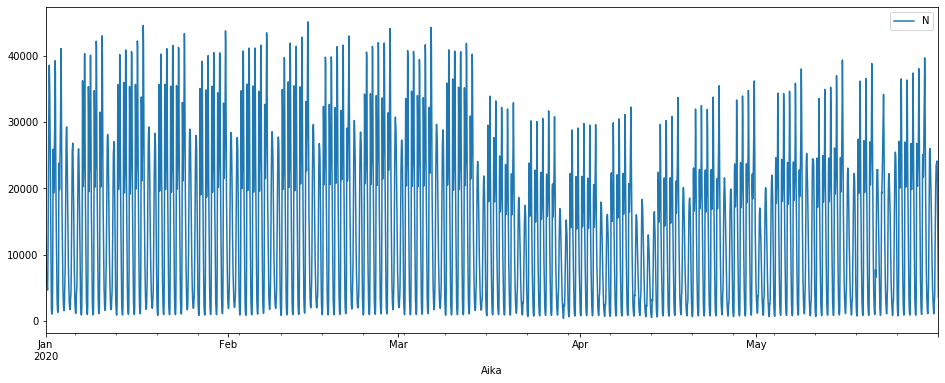

In [19]:
import matplotlib.pyplot as plt

df2.plot(figsize=(16,6))
plt.savefig('traffic_Jan_to_May.jpg')

In [20]:
df2.to_csv('lam_data_processed.csv', encoding='utf-8')